# Predicting future global temperature and greenhouse gas emission

Global warming, marked by a sustained increase in average temperatures, leads to lasting changes in weather patterns and ecosystems. This project aims to predict the future interplay between greenhouse gas (GHG) emissions and global temperature changes. CO2, CH4, and N2O, identified by the European Commission as the most impactful gases on global warming (European Commission, 2018), are the focus of this study. By examining the relationships between these emissions and temperature fluctuations, the study seeks to provide predictive insights for formulating effective environmental policies.

Climate change, defined by long-term shifts in weather patterns, is significantly affecting life on Earth. Substantial evidence, such as the rise in ocean temperatures and the increased frequency of extreme weather events, underscores the reality of climate change. Addressing global warming is a critical challenge that demands accurate predictions of GHG emissions and temperature impacts, essential for developing strategies to mitigate its effects on a global scale.

## Problem Statements

**1-Quantify the Relationship:** Analyze the correlation between CO2, N2O, and CH4 emissions with global temperature variations to understand the relative impact of each GHG on climate change.

**2-Trend Analysis:** Identify and model trends in both GHG emissions and global temperature changes over the decades to forecast future climate conditions.

**3-Predictive Modeling:** Develop predictive models to forecast future global temperature changes based on current and hypothetical future GHG emission trends.


### 1.Data Wrangling
### 1.1.Data Collection

For this project I identified three ,main data sources NOAA(https://gml.noaa.gov/ccgg/trends/global.html), the Berkeley Earth (https://berkeleyearth.org/data/), and Met office climate dashboard (https://climate.metoffice.cloud/greenhouse_gases.html#datasets). The datasets provided are all publicly available.

**Temperature dataset**
Berkely is provided as set of csv file,contains a detailed summary of the land-surface average results produced by the Berkeley Averaging method.  Temperatures are in Celsius and reported as anomalies relative to the Jan 1951-Dec 1980 average.  Uncertainties represent the 95% confidence interval for statistical and spatial undersampling effects.


**GHG datasets**

The Global Monitoring Laboratory has measured carbon dioxide and other greenhouse gases for several decades at a globally distributed network of air sampling sites [Conway, 1994].The dataset includes global monthly average of GHG.

Monthly nitrous oxide(N2O) concentration in the atmosphere as calculated by WDCGG . WMO Greenhouse Gas Bulletin, No.19, 2023. 15 November 2023 ISSN 2078-0796(https://library.wmo.int/records/item/68532-no-19-15-november-2023) 

* N2O expressed as a mole fraction in dry air, nanomol/mol, abbreviated as ppb-(1984-2022)
* CO2 expressed as a mole fraction in dry air, micromol/mol, abbreviated as ppm-(1979-2024)
* CH4 expressed as a mole fraction in dry air, nanomol/mol, abbreviated as ppb-(1983-2024)
* Temperature expressed as(°C)-(1880-2023)


Lan, X., Tans, P. and K.W. Thoning: Trends in globally-averaged CO2 determined from NOAA Global Monitoring Laboratory measurements. Version 2024-08 https://doi.org/10.15138/9N0H-ZH07

### 1.2. Import libreries

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### 1.3.Data Loading

The GHG CSV files are contains a lot of commented lines at the beginning, which are not part of the actual data. These comments are causing the ParserError because the CSV parser is expecting data and instead is encountering lines that don't match the expected format. To fix this issue, I want to skip these commented lines when reading the CSV file.

In [77]:
# load global temperature data
temp= pd.read_csv("https://raw.githubusercontent.com/Mary080102/Capstone-3/main/Raw%20data/Global%20Temperatures.csv")
temp


,Year,Month,Month Anomaly,Month Unc.,Annual Anomaly,Annual Unc.,Five-year Anomaly,Five-year Unc.,Ten-year Anomaly,Ten-year Unc.,Twenty-year Anomaly,Twenty-year Unc.
0,1850,1,-0.801,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.102,0.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.119,0.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.485,0.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.351,0.549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2072,2022,9,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2073,2022,10,1.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2074,2022,11,0.626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2075,2022,12,0.923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
# Load the CO2 CSV file, skipping the commented lines
co2= pd.read_csv("https://raw.githubusercontent.com/Mary080102/Capstone-3/main/Raw%20data/co2_mm_gl.csv",
                 comment='#',skiprows=38)

In [79]:
co2

,year,month,decimal,average,average_unc,trend,trend_unc
0,1979,1,1979.042,336.56,0.11,335.92,0.09
1,1979,2,1979.125,337.29,0.09,336.25,0.10
2,1979,3,1979.208,337.88,0.11,336.51,0.10
3,1979,4,1979.292,338.32,0.12,336.72,0.10
4,1979,5,1979.375,338.26,0.03,336.71,0.10
...,...,...,...,...,...,...,...
540,2024,1,2024.042,422.26,0.10,421.16,0.06
541,2024,2,2024.125,422.71,0.10,421.31,0.06
542,2024,3,2024.208,423.24,0.10,421.59,0.06
543,2024,4,2024.292,423.65,0.10,421.80,0.06


In [80]:
# Load the CH4 CSV file, skipping the commented lines
ch4= pd.read_csv("https://raw.githubusercontent.com/Mary080102/Capstone-3/main/Raw%20data/ch4_mm_gl.csv",
                comment='#',skiprows=45)

In [81]:
ch4

,year,month,decimal,average,average_unc,trend,trend_unc
0,1983,7,1983.542,1626.09,2.26,1635.14,1.45
1,1983,8,1983.625,1628.01,2.88,1635.67,1.39
2,1983,9,1983.708,1638.42,2.34,1636.25,1.32
3,1983,10,1983.792,1644.81,1.50,1636.89,1.24
4,1983,11,1983.875,1642.59,0.73,1637.60,1.16
...,...,...,...,...,...,...,...
485,2023,12,2023.958,1931.87,-9.99,1927.32,-9.99
486,2024,1,2024.042,1930.21,-9.99,1928.35,-9.99
487,2024,2,2024.125,1928.40,-9.99,1929.36,-9.99
488,2024,3,2024.208,1929.88,-9.99,1930.38,-9.99


In [82]:
#Load the N2O CSV file
n2o= pd.read_csv('https://raw.githubusercontent.com/Mary080102/Capstone-3/main/Raw%20data/n2o_WDCGG%20N2O.csv')

In [83]:
n2o

,Year,Month,WDCGG N2O (ppb),WDCGG N2O uncertainty
0,1984,1,303.8,NaN
1,1984,2,303.8,NaN
2,1984,3,303.7,NaN
3,1984,4,303.7,NaN
4,1984,5,303.7,NaN
...,...,...,...,...
463,2022,8,335.8,NaN
464,2022,9,335.9,NaN
465,2022,10,336.1,NaN
466,2022,11,336.3,NaN


### 1.4. Data cleaning

In this step we need to clean up the data for column's name, data type, and remove unnecessary columns. In this project we need only first four columns of temperature dataset  that show monthly average for anomaly and uncertainty. So, we delete the other columns.

In [84]:
# Remove space in header

temp.columns= temp.columns.str.strip()
temp.columns

Index(['Year', 'Month', 'Month Anomaly', 'Month Unc.', 'Annual Anomaly',
       'Annual Unc.', 'Five-year Anomaly', 'Five-year Unc.',
       'Ten-year Anomaly', 'Ten-year Unc.', 'Twenty-year Anomaly',
       'Twenty-year Unc.'],
      dtype='object')

In [85]:
# Delete unnecessary Columns
temp_drop = temp.drop(columns=['Annual Anomaly',
       'Annual Unc.', 'Five-year Anomaly', 'Five-year Unc.',
       'Ten-year Anomaly', 'Ten-year Unc.', 'Twenty-year Anomaly',
       'Twenty-year Unc.'],axis=1)
temp_drop

,Year,Month,Month Anomaly,Month Unc.
0,1850,1,-0.801,0.482
1,1850,2,-0.102,0.592
2,1850,3,-0.119,0.819
3,1850,4,-0.485,0.575
4,1850,5,-0.351,0.549
...,...,...,...,...
2072,2022,9,0.971,NaN
2073,2022,10,1.126,NaN
2074,2022,11,0.626,NaN
2075,2022,12,0.923,NaN


In [70]:
temp_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           2077 non-null   int64  
 1   Month          2077 non-null   int64  
 2   Month Anomaly  2077 non-null   float64
 3   Month Unc.     2077 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 65.0+ KB


Based on the results of .info(), data type of  Month Unc must be changed to float.


In [86]:
# Convert  Month Unc column to float

temp_drop[['Month Unc.']]=temp_drop[['Month Unc.']].astype(float)

In [72]:
temp_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077 entries, 0 to 2076
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           2077 non-null   int64  
 1   Month          2077 non-null   int64  
 2   Month Anomaly  2077 non-null   float64
 3   Month Unc.     2064 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 65.0 KB


In [87]:
temp_drop.describe()

,Year,Month,Month Anomaly,Month Unc.
count,2077.000000,2077.000000,2077.000000,2064.000000
mean,1936.041887,6.497352,0.039636,0.148037
std,49.976436,3.454161,0.418716,0.127912
min,1850.000000,1.000000,-0.970000,0.029000
25%,1893.000000,3.000000,-0.253000,0.050000
50%,1936.000000,6.000000,-0.039000,0.121000
75%,1979.000000,9.000000,0.252000,0.185000
max,2023.000000,12.000000,1.499000,0.930000


In [88]:
# change column name in temperature dataset
temp_drop= temp_drop.rename(columns={'Month Anomaly':'Anomaly', 'Month Unc.':'Uncertainty'})
temp_drop

,Year,Month,Anomaly,Uncertainty
0,1850,1,-0.801,0.482
1,1850,2,-0.102,0.592
2,1850,3,-0.119,0.819
3,1850,4,-0.485,0.575
4,1850,5,-0.351,0.549
...,...,...,...,...
2072,2022,9,0.971,NaN
2073,2022,10,1.126,NaN
2074,2022,11,0.626,NaN
2075,2022,12,0.923,NaN


In [89]:
# Drop unnecessary Columns in CO2 data set

co2= co2.drop(['decimal','average_unc','trend','trend_unc'], axis=1) 
co2.head()

,year,month,average
0,1979,1,336.56
1,1979,2,337.29
2,1979,3,337.88
3,1979,4,338.32
4,1979,5,338.26


In [90]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     545 non-null    int64  
 1   month    545 non-null    int64  
 2   average  545 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 12.9 KB


In [91]:
co2.describe()

,year,month,average
count,545.000000,545.000000,545.000000
mean,2001.211009,6.467890,374.240991
std,13.124176,3.458177,24.594662
min,1979.000000,1.000000,334.360000
25%,1990.000000,3.000000,353.910000
50%,2001.000000,6.000000,371.050000
75%,2013.000000,9.000000,393.990000
max,2024.000000,12.000000,423.650000


In [92]:
# change column name in CO2 dataset
co2=co2.rename(columns={'average':'CO2','year':'Year','month':'Month'})
co2

,Year,Month,CO2
0,1979,1,336.56
1,1979,2,337.29
2,1979,3,337.88
3,1979,4,338.32
4,1979,5,338.26
...,...,...,...
540,2024,1,422.26
541,2024,2,422.71
542,2024,3,423.24
543,2024,4,423.65


In [18]:
ch4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         490 non-null    int64  
 1   month        490 non-null    int64  
 2   decimal      490 non-null    float64
 3   average      490 non-null    float64
 4   average_unc  490 non-null    float64
 5   trend        490 non-null    float64
 6   trend_unc    490 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 26.9 KB


In [93]:
# Drop unnecessary Columns in CH4 data set

ch4=ch4.drop(['decimal','average_unc','trend','trend_unc'], axis=1) 
ch4.head()

,year,month,average
0,1983,7,1626.09
1,1983,8,1628.01
2,1983,9,1638.42
3,1983,10,1644.81
4,1983,11,1642.59


In [94]:
ch4.describe()

,year,month,average
count,490.000000,490.000000,490.000000
mean,2003.416327,6.504082,1779.213429
std,11.806126,3.461885,68.925598
min,1983.000000,1.000000,1626.090000
25%,1993.000000,3.250000,1738.655000
50%,2003.000000,7.000000,1775.770000
75%,2014.000000,9.750000,1818.282500
max,2024.000000,12.000000,1931.910000


In [95]:
# change column name in CH4 dataset
ch4=ch4.rename(columns={'average':'CH4','year':'Year','month':'Month'})
ch4

,Year,Month,CH4
0,1983,7,1626.09
1,1983,8,1628.01
2,1983,9,1638.42
3,1983,10,1644.81
4,1983,11,1642.59
...,...,...,...
485,2023,12,1931.87
486,2024,1,1930.21
487,2024,2,1928.40
488,2024,3,1929.88


In [20]:
n2o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   468 non-null    int64  
 1   Month                  468 non-null    int64  
 2   WDCGG N2O (ppb)        468 non-null    float64
 3   WDCGG N2O uncertainty  0 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 14.8 KB


In [96]:
# Drop unnecessary Columns in N2O data set

n2o= n2o.drop('WDCGG N2O uncertainty',axis=1)
n2o.head()

,Year,Month,WDCGG N2O (ppb)
0,1984,1,303.8
1,1984,2,303.8
2,1984,3,303.7
3,1984,4,303.7
4,1984,5,303.7


In [97]:
n2o.describe()

,Year,Month,WDCGG N2O (ppb)
count,468.000000,468.000000,468.000000
mean,2003.000000,6.500000,318.371154
std,11.266672,3.455747,9.199888
min,1984.000000,1.000000,303.700000
25%,1993.000000,3.750000,310.200000
50%,2003.000000,6.500000,317.650000
75%,2013.000000,9.250000,326.000000
max,2022.000000,12.000000,336.500000


In [98]:
# change column name in N2O dataset
n2o= n2o.rename(columns={'WDCGG N2O (ppb)':'N2O'})
n2o

,Year,Month,N2O
0,1984,1,303.8
1,1984,2,303.8
2,1984,3,303.7
3,1984,4,303.7
4,1984,5,303.7
...,...,...,...
463,2022,8,335.8
464,2022,9,335.9
465,2022,10,336.1
466,2022,11,336.3


### 1.4.1.Check Missing Values and duplicates


In [102]:
# Check temperature dataset for missing values

temp_drop.isnull().sum()

Year            0
Month           0
Anomaly         0
Uncertainty    13
dtype: int64

Based on the results above, there are 13 missing values in the Uncertainty column. Since we are not using this column at this time, we have not addressed the missing values.

In [101]:
# Check temperature dataset for duplicate rows

duplicates= temp_drop.duplicated()

# Display rows that are duplicates
print(temp_drop[duplicates])

Empty DataFrame
Columns: [Year, Month, Anomaly, Uncertainty]
Index: []


Based on the result there are no duplicate in temperature dataset.

In [25]:
# check CO2 dataset for missing values
co2.isnull().sum()

year           0
month          0
decimal        0
average        0
average_unc    0
trend          0
trend_unc      0
dtype: int64

In [103]:
# Check CO2 dataset for duplicates 

co2.duplicated().sum()

0

Based on the results, the CO2 dataset does not have missing values or duplicates.

In [104]:
# check CH4 dataset for missing values
ch4.isnull().sum()

Year     0
Month    0
CH4      0
dtype: int64

In [105]:
## check CH4 dataset for duplicates
ch4.duplicated().sum()

0

Based on the results, the CH4 dataset does not have missing values or duplicates.

In [106]:
## check N2O dataset for missing values
n2o.isnull().sum()

Year     0
Month    0
N2O      0
dtype: int64

In [107]:
# # check CO2 dataset for duplicates
n2o.duplicated().sum()

0

Based on the results, we do not have missing values or duplicates in our datasets.

### 1.5.Merging datasets

The datasets are in different time periods. Before merging them we need to align them to a common period to ensure consistency in the analysis.In this project, the common period across all datasets would likely be from 1984 to 2022, as these years are covered by all the datasets. By using filter each dataset to only include data within this common period (1984-2022). This will allow us to merge the datasets without introducing gaps or inconsistencies.

In [108]:
# Define the common period
start_year=1984
end_year=2022

# Filter datasets to the common period
temp_filterd= temp_drop[(temp_drop['Year']>=start_year)&(temp_drop['Year']<= end_year)]

co2_filtered= co2[(co2['Year']>=start_year)&(co2['Year']<=end_year)]

ch4_filtered= ch4[(ch4['Year']>=start_year)&(ch4['Year']<= end_year)]

n2o_filtered= n2o[(n2o['Year']>=start_year)&(n2o['Year']<=end_year)]

In [109]:
# Merging datasets on 'Year' and 'Month' columns

df1= pd.merge(temp_filterd,co2_filtered, on=['Year','Month'], how='inner')

df2= pd.merge(df1,ch4_filtered, on=['Year','Month'], how='inner')

df3= pd.merge(df2,n2o_filtered, on=['Year','Month'], how='inner')

In [110]:
df3

,Year,Month,Anomaly,Uncertainty,CO2,CH4,N2O
0,1984,1,0.280,0.046,344.32,1638.79,303.8
1,1984,2,0.016,0.045,344.82,1638.84,303.8
2,1984,3,0.280,0.046,344.96,1640.88,303.7
3,1984,4,0.125,0.040,345.19,1643.99,303.7
4,1984,5,0.464,0.048,345.33,1643.12,303.7
...,...,...,...,...,...,...,...
463,2022,8,1.039,NaN,414.41,1908.82,335.8
464,2022,9,0.971,NaN,414.63,1915.52,335.9
465,2022,10,1.126,NaN,416.14,1919.85,336.1
466,2022,11,0.626,NaN,417.77,1923.43,336.3


### 2. Exploratory Data Analysis

### 2.1.Calculate Actual Temperature

The temperature dataset contains a detailed summary of the land-surface average results produced by the Berkeley Averaging method.Temperatures are in Celsius and reported as anomalies relative to the Jan 1951-Dec 1980 
average. Results are based on 40532 time series with 18975001 data points. 
To calculate the actual temperature from the anomaly, we need two pieces of information: the anomaly value and the reference temperature.
The reference temperature is the average temperature over a specific period, typically a 30-year period, often referred to as the baseline period. This period is used to establish a normal or average temperature for a specific location. The reference temperature can be obtained from historical temperature records or climate datasets. The Berkeley use the the **"Estimated Jan 1951–Dec 1980 monthly absolute temperature"** refers to the average temperatures for each month during the period from January 1951 to December 1980. These temperatures are estimated values representing the average absolute temperature (in degrees Celsius) for each month over this 30-year period.

**Anomaly** value represents the deviation of the actual temperature from the reference temperature. It can be either positive or negative, depending on whether the actual temperature is above or below the reference temperature. To calculate the actual temperature, you add the anomaly value to the reference temperature.
The picture below shows refrence temperature for the datase.

**<u>Actual temperature = Reference temperature + Anomaly value**</u>


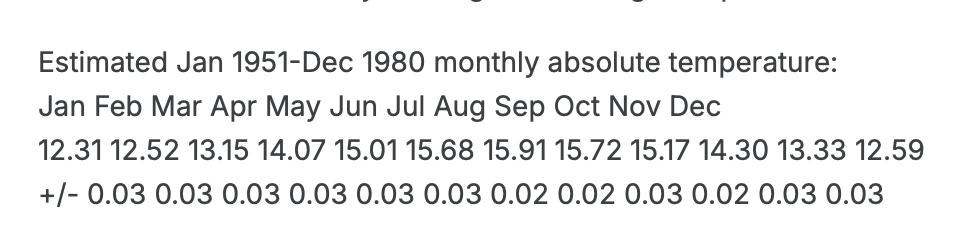




I can use this reference temperature to calculate the actual temperature for the dataset by adding the temperature anomaly to the reference temperature.


In [111]:
# Define the refrence monthly absolute temperatures (1951-1980)
monthly_refrence_temps = {
    1: 12.31,  # January
    2: 12.52,  # February
    3: 13.15,  # March
    4: 14.07,  # April
    5: 15.01, # May
    6: 15.68, # June
    7: 15.91, # July
    8: 15.72, # August
    9: 15.17, # September
    10: 14.30, # October
    11: 13.33, # November
    12: 12.59  # December
}

# Function to calculate the actual temperature based on the anomaly and month

def calculate_actual_temp(row):
    month = row['Month']
    anomaly = row['Anomaly']
    refrence_temp = monthly_refrence_temps[month]
    return refrence_temp + anomaly

# Apply the function to each row in the dataframe
df3['Actual_Temperature'] = df3.apply(calculate_actual_temp, axis=1)

In [112]:
df3

,Year,Month,Anomaly,Uncertainty,CO2,CH4,N2O,Actual_Temperature
0,1984,1,0.280,0.046,344.32,1638.79,303.8,12.590
1,1984,2,0.016,0.045,344.82,1638.84,303.8,12.536
2,1984,3,0.280,0.046,344.96,1640.88,303.7,13.430
3,1984,4,0.125,0.040,345.19,1643.99,303.7,14.195
4,1984,5,0.464,0.048,345.33,1643.12,303.7,15.474
...,...,...,...,...,...,...,...,...
463,2022,8,1.039,NaN,414.41,1908.82,335.8,16.759
464,2022,9,0.971,NaN,414.63,1915.52,335.9,16.141
465,2022,10,1.126,NaN,416.14,1919.85,336.1,15.426
466,2022,11,0.626,NaN,417.77,1923.43,336.3,13.956


### 2.2.Exploring the Data

In [113]:
# make a copy of df3

df= df3.copy()

#Summary Statistics Table


df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,468.0,2003.000000,11.266672,1984.000,1993.00000,2003.0000,2013.00000,2022.000
Month,468.0,6.500000,3.455747,1.000,3.75000,6.5000,9.25000,12.000
Anomaly,468.0,0.629434,0.309458,-0.194,0.41725,0.6380,0.87225,1.499
Uncertainty,456.0,0.044318,0.005676,0.029,0.04100,0.0440,0.04700,0.076
CO2,468.0,376.972778,21.605372,342.130,357.49750,374.7150,394.48000,418.800
CH4,468.0,1776.079274,63.082586,1638.010,1738.86500,1775.4800,1813.46000,1924.690
N2O,468.0,318.371154,9.199888,303.700,310.20000,317.6500,326.00000,336.500
Actual_Temperature,468.0,14.776100,1.316157,12.326,13.50600,14.8395,15.98975,16.972


### 2.3.Data Distributions

In [115]:
#Create a Subset of the DataFrame to plot only desired columns

columns_to_plot=['CO2','CH4','N2O','Actual_Temperature','Anomaly']

df_subset= df[columns_to_plot]

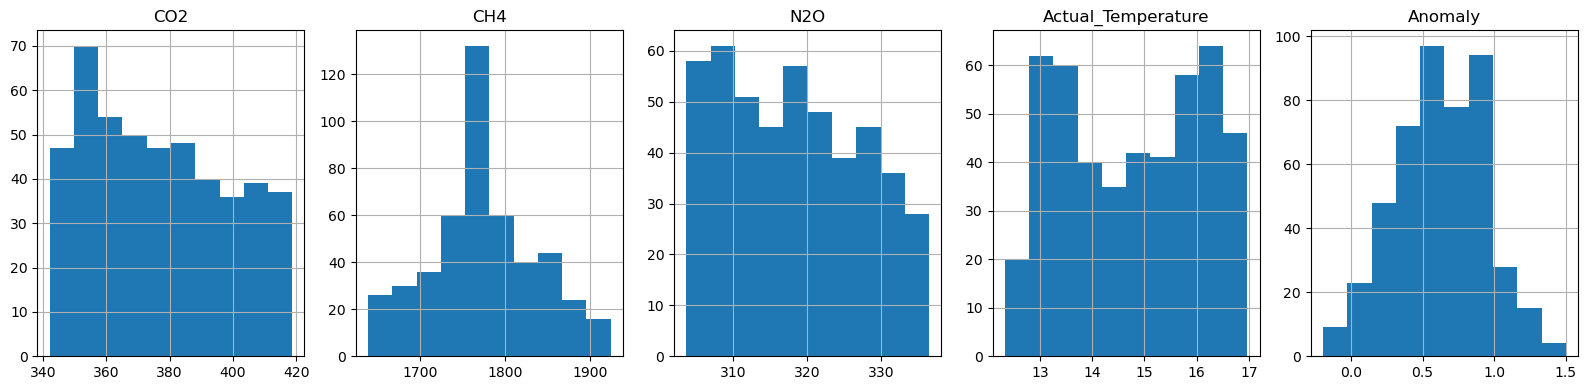

In [116]:
#Making histogram

df_subset.hist(layout=(1,5), bins=10, figsize=(16, 4))
plt.tight_layout()
plt.show()

Based on the above plots:

**CO2:**

The histogram for CO2 displays a right-skewed distribution.The majority of CO2 values are concentrated between 360 and 400 parts per million (ppm), with a noticeable peak around 370 ppm.

**CH4:**

The CH4 (methane) histogram shows a sharp peak around 1800 parts per billion (ppb).Most of the CH4 data points are concentrated around this peak, indicating a relatively tight clustering of methane values.


**N2O:**

The N2O (nitrous oxide) histogram appears to have a relatively flat distribution with some slight skewness.The N2O values are spread out across the range of 310 to 330 ppb, with no extremely pronounced peaks.

**Actual Temperature:**

The histogram for actual temperature appears to have two distinct peaks, one around 13°C and another around 16°C.
This bimodal distribution suggests that there are two prevalent temperature ranges within the dataset.

### 2.4.Visualization

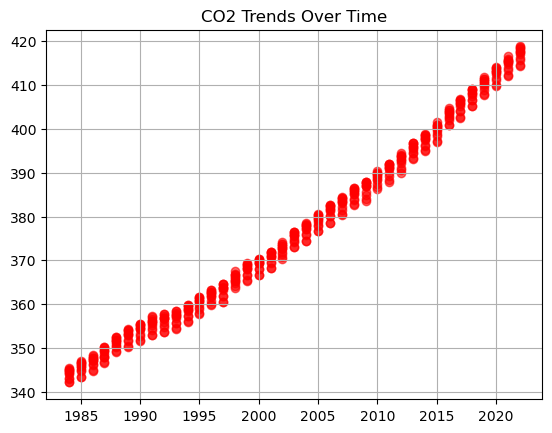

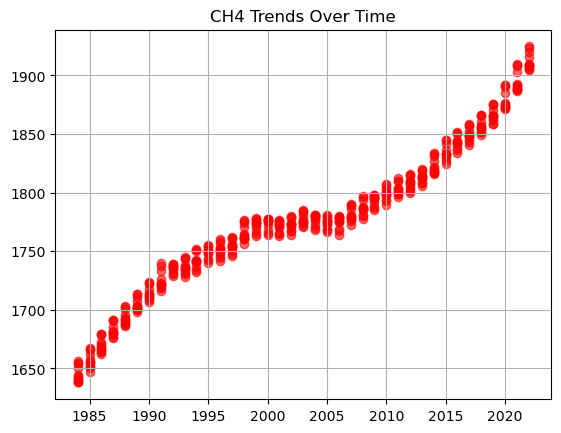

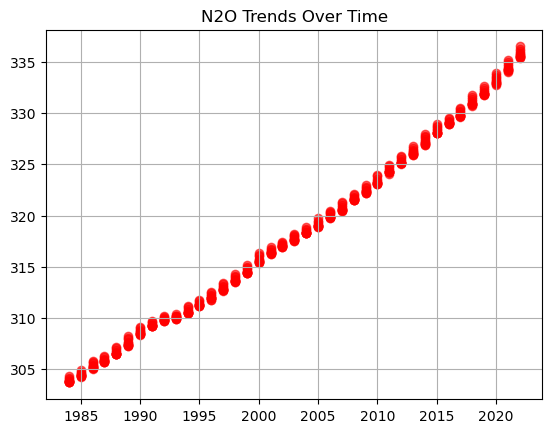

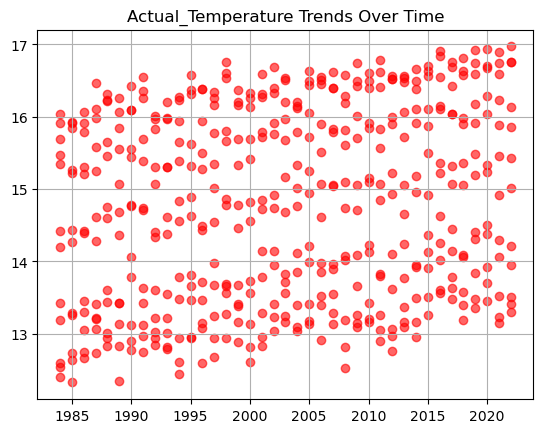

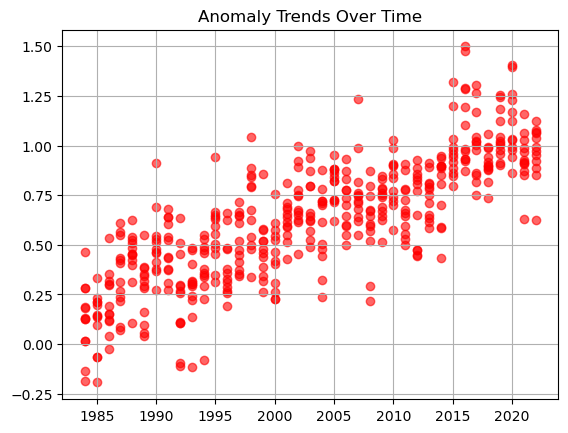

In [120]:
year=df['Year']
def plot_trend(year,data,color='red',label=None,title=None, alpha=0.6):
    """
    Plots the trend of a given data series over time.

    Parameters:
    year (pd.Series or np.array): Array or Series of years.
    data (pd.Series or np.array): Array or Series of data points corresponding to the years.
    label (str, optional): Label for the plot. Defaults to None.
    color (str, optional): Color for the plot. Defaults to 'red'.
    title (str): Title of the plot. Default is None.
    alpha (float, optional): Transparency level for the plot. Defaults to 0.6.
    """
    #plt.plot(year, data, color=color, label=label, alpha=alpha)
    plt.scatter(year, data, color=color, alpha=alpha)
    plt.title(title if title else f'{column} Trends Over Time')
    
    # Set grid
    plt.grid(True)

    plt.show()

# Plotting for all columns except 'Year'
for column in df_subset.columns:
    if column != 'Year':
        plot_trend(year, df[column], label=column, alpha=0.6)

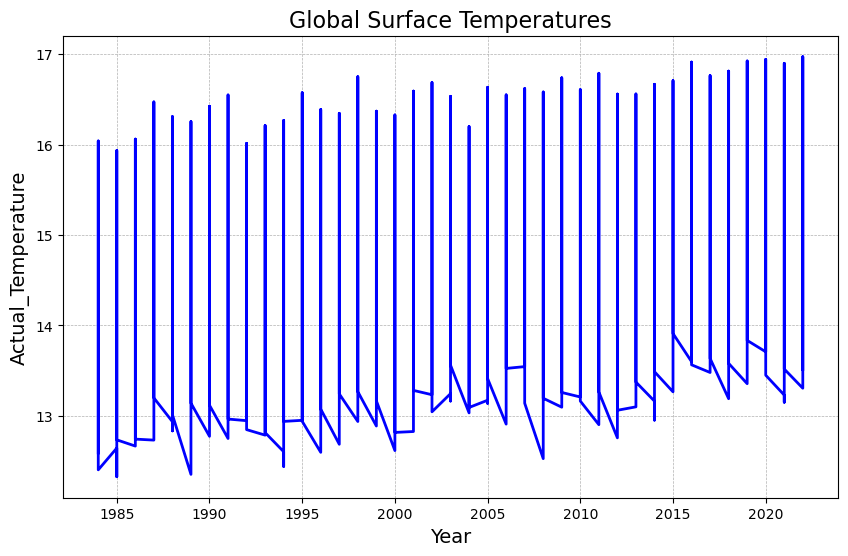

In [124]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(year, df['Actual_Temperature'], color='blue', linewidth=2, label='temp')

# Setting title and labels
ax.set_title('Global Surface Temperatures', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Actual_Temperature', fontsize=14)

# Grid settings
ax.grid(True, linestyle='--', linewidth=0.5)


# Show plot
plt.show()

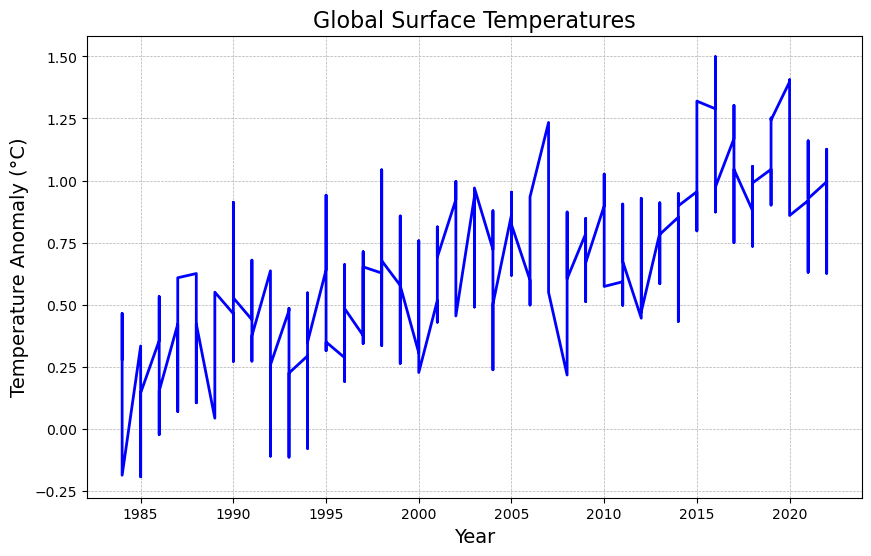

In [123]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(year, df['Anomaly'], color='blue', linewidth=2, label='temp')

# Setting title and labels
ax.set_title('Global Surface Temperatures', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Temperature Anomaly (°C)', fontsize=14)

# Grid settings
ax.grid(True, linestyle='--', linewidth=0.5)


# Show plot
plt.show()

### 2.5. Correlation Analysis

In this section we can call the .corr() method on our data to look at all the correlations between our variables.

In [125]:
# Call the .corr() method on the dataset 

df[['Year','N2O','CH4','CO2','Actual_Temperature','Anomaly']].corr()

,Year,N2O,CH4,CO2,Actual_Temperature,Anomaly
Year,1.000000,0.996667,0.969320,0.993498,0.189525,0.806068
N2O,0.996667,1.000000,0.973355,0.997056,0.181653,0.801745
CH4,0.969320,0.973355,1.000000,0.965819,0.141102,0.787354
CO2,0.993498,0.997056,0.965819,1.000000,0.157250,0.802255
Actual_Temperature,0.189525,0.181653,0.141102,0.157250,1.000000,0.207998
Anomaly,0.806068,0.801745,0.787354,0.802255,0.207998,1.000000


In [128]:
warnings.filterwarnings("ignore", category=FutureWarning)

/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marzieh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

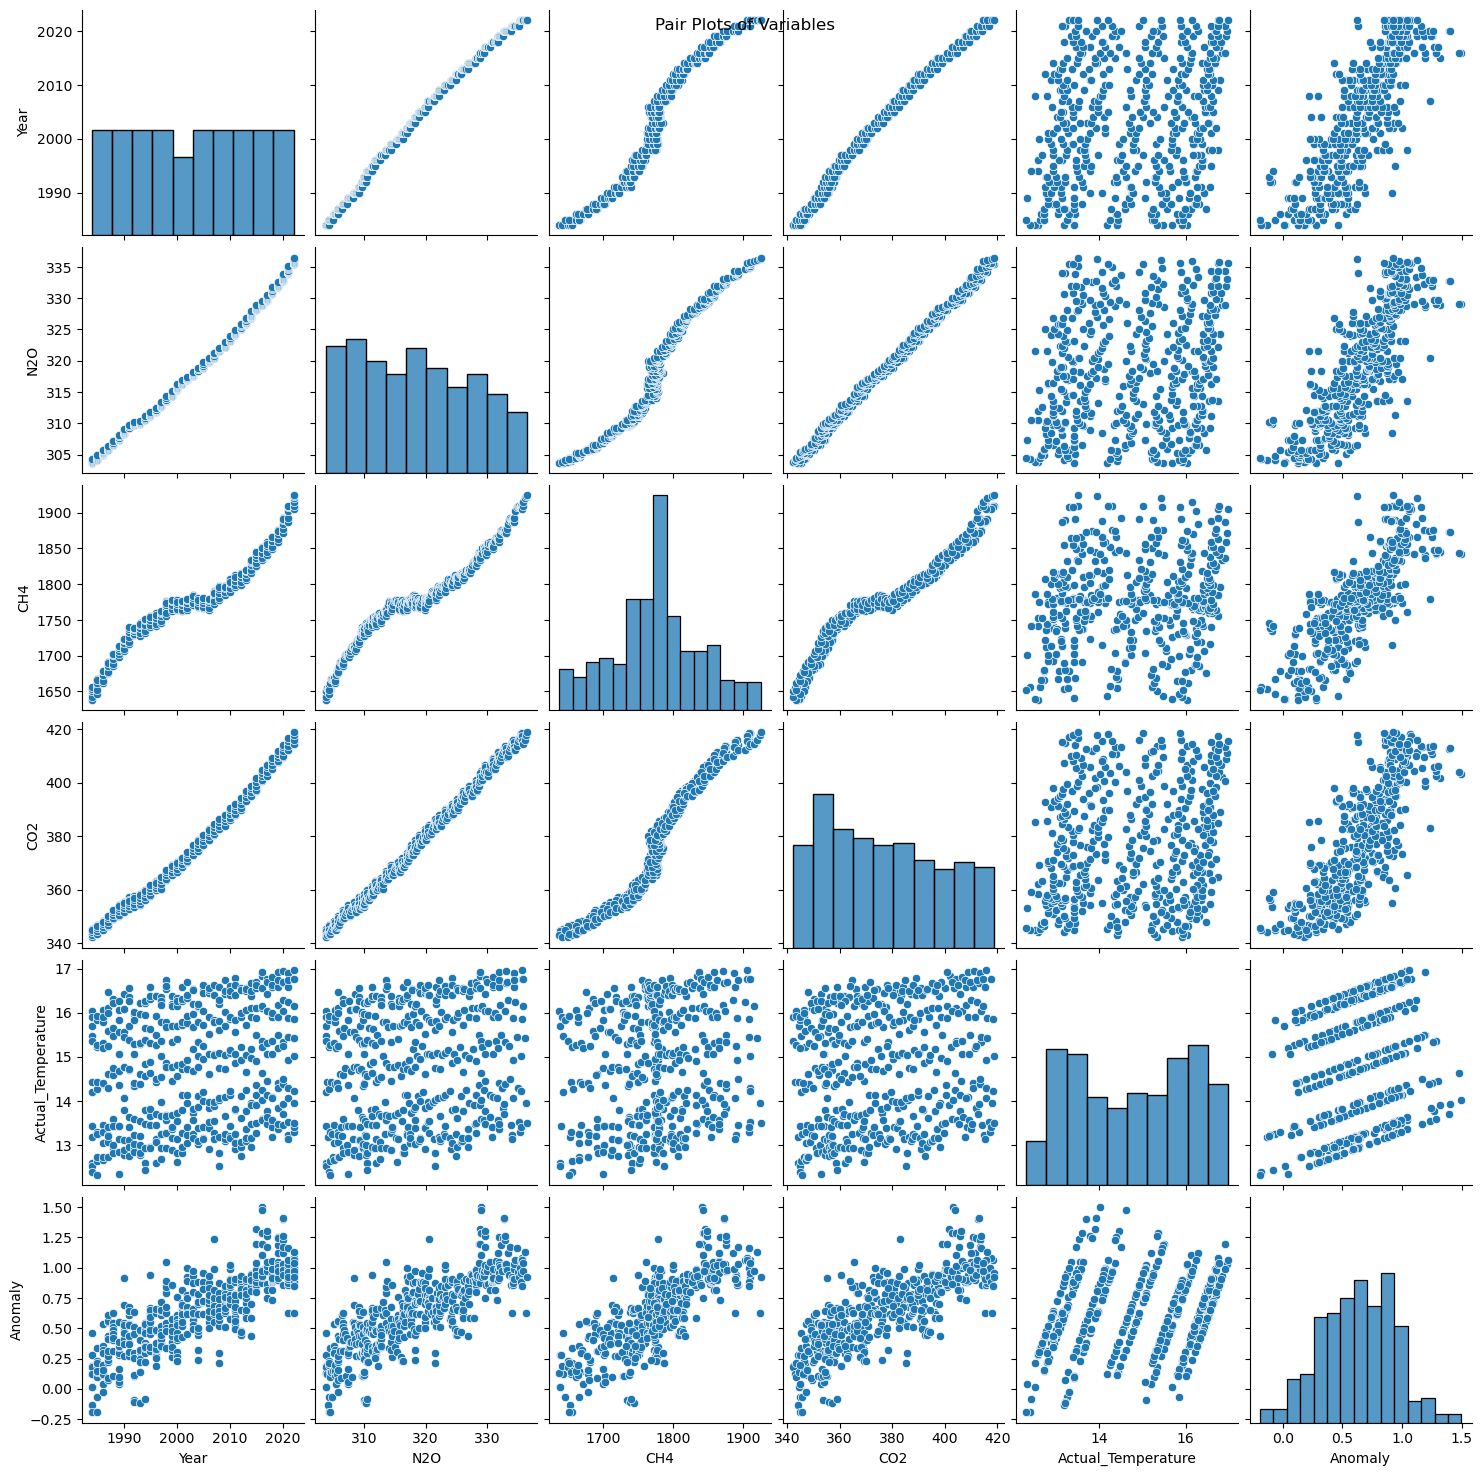

In [ ]:
#Plotting the pairwise relationships in the dataset, to check out how our variables relate to one another

sns.pairplot(df[['Year','N2O','CH4','CO2','Actual_Temperature','Anomaly']])
plt.suptitle('Pair Plots of Variables')
plt.show()

### 2.5.1.Visualize Relationships Between Variables

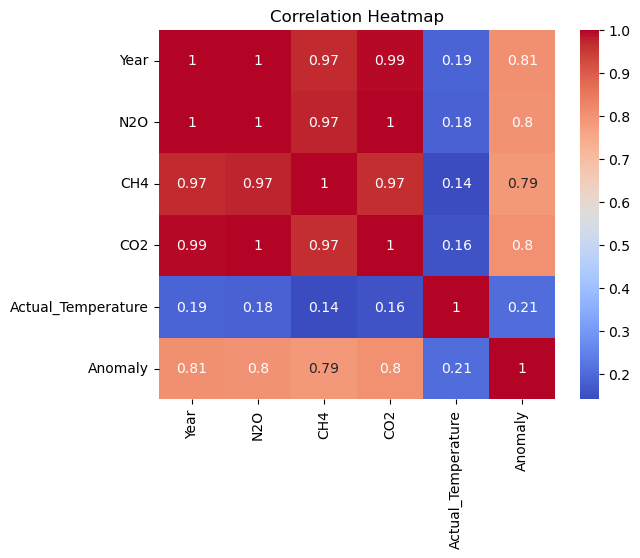

In [129]:
#correlation matrix 
#Create a correlation heatmap for looking at the correlation of all variables/features for dataset

sns.heatmap(df[['Year','N2O','CH4','CO2','Actual_Temperature','Anomaly']].corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **1-Strong Correlations**

**Correlation beeween Year and Greenhouse Gases (N2O, CH4, CO2):**

The heatmap shows very high positive correlations (close to 1) between Year and the levels of greenhouse gases like N2O, CH4, and CO2. This indicates that as time progresses (Year increases), the concentration of these gases also increases. This is consistent with historical trends where greenhouse gas concentrations have risen over the years due to human activities.

**Correlation between Greenhouse Gases and Each Other (N2O, CH4, CO2):**

The correlations between N2O, CH4, and CO2 are also very high (close to 1). This suggests that these gases tend to increase together, possibly due to common sources (e.g., industrial activities, agriculture, fossil fuel combustion).

### **2. Moderate Correlations**

**Correlation between Year and Anomaly:**

The correlation between Year and Anomaly (likely representing temperature anomaly) is moderately strong (0.81). This suggests that as the years progress, the temperature anomaly tends to increase, indicating a warming trend.

**Correlation between Anomaly and Greenhouse Gases:

The correlation between Anomaly and the greenhouse gases (N2O, CH4, CO2) is moderate to strong (0.79 to 0.81). This implies that higher concentrations of these gases are associated with greater temperature anomalies, which aligns with the understanding that greenhouse gases contribute to global warming.

### **3. Weaker Correlations**

**Correlation between Actual Temperature and Greenhouse Gases:** 

The correlations between Actual Temperature and the greenhouse gases are relatively weak (0.14 to 0.19). This could indicate that the immediate temperature response to changes in greenhouse gas concentrations might not be straightforward or may involve more complex interactions, including other factors like natural variability, feedback mechanisms, or regional differences.

**Correlation between Actual Temperature and Anomaly:**

The correlation between Actual Temperature and Anomaly is also relatively low (0.21), suggesting that while there is some relationship, it might not be directly proportional. The Anomaly might capture deviations from a baseline or average temperature, which could explain the weaker correlation.